In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
plt.rcParams["figure.dpi"] = 120
plot_size = 6

In [150]:
data_dir = "../data"

In [151]:
df = pd.read_pickle(f"{data_dir}/results_718609_llama-awq_trivia.pkl")

In [152]:
df

,question,completion,completion_length,correct_answers,evaluation,completion_gradient,rephrased_completions,rephrased_completion_lengths,rephrased_gradients,rephrased_gradient_std
0,La Paz is the administrative capital of which ...,La Paz is the administrative capital of Bolivia.,10,"[Bolivia, Plurinational State of, Name of Boli...",True,18.921875,[The administrative capital of Bolivia is La P...,"[10, 13, 14]","[25.015625, 36.1875, 33.125]",8272.0
1,"""What did Shylock ask for a pound of in """"The ...",A) A loan from Antonio\nB) A loan from Bassani...,46,"[Human flesh, Flesh]",False,25.687500,"[A financial advance provided by Antonio., A b...","[7, 9, 9]","[70.5, 53.125, 79.5625]",14784.0
2,In music how many crotchets make up a semibreve?,A semibreve is equal to 2 crotchets or 4 minim...,39,"[FOUR (New Zealand TV Channel), FOUR (TV chann...",False,17.750000,[A semibreve is equivalent to 2 crotchets or 4...,"[40, 39, 40]","[21.046875, 21.328125, 18.515625]",5764.0
3,Who taught Eliza Dolittle to be a lady ?,"In the play ""Pygmalion"" by George Bernard Shaw...",76,[Professor Henry Higgins],True,10.546875,"[In George Bernard Shaw's play 'Pygmalion', th...","[83, 83, 83]","[16.578125, 12.9140625, 16.609375]",5824.0
4,What is the largest city in Turkey?,"The largest city in Turkey is Istanbul, which ...",32,"[Stambulu, Istanbul (Turkey), Istanbul, UN/LOC...",True,7.355469,"[Istanbul, situated on the Bosphorus Strait, i...","[31, 29, 37]","[16.9375, 16.15625, 13.359375]",4812.0
...,...,...,...,...,...,...,...,...,...,...
94,What is mixed with whisky to make a rusty nail,?\n\nA rusty nail is a cocktail made with whis...,68,"[Drambuie, Drambui, Drambooie]",False,11.187500,[A rusty nail is a cocktail consisting of whis...,"[55, 56, 60]","[14.6796875, 13.6015625, 13.078125]",5672.0
95,What was the name of the Flintstones' pet?,"The Flintstones' pet was a dog named ""Doggie.""...",36,[Dino],False,36.187500,[The Flintstones had a pet dog called 'Doggie....,"[15, 19, 16]","[32.625, 31.40625, 31.328125]",6296.0
96,"Referring to the cause of a person's downfall,...",A. Hera\nB. Athena\nC. Aphrodite\nD. Artemis\n...,96,"[Arch nemesis, Nemesis (video game), Nemesis, ...",False,6.394531,[A. Hera\nB. Athena\nC. Aphrodite\nD. Artemis\...,"[103, 97, 103]","[13.734375, 12.5, 18.515625]",4396.0
97,"If New York City is the 'Big Apple', which US ...",The term 'Big Apple' is a nickname for New Yor...,55,"[Honolulu, Hawaii, USA, History of Honolulu, H...",False,7.886719,['Big Apple' is a colloquial term for New York...,"[51, 47, 52]","[18.65625, 32.875, 20.25]",5412.0


In [153]:
df["completion_gradient_normalized"] = df.apply(lambda row: row["completion_gradient"] / row["completion_length"] if row["completion_length"] > 0 else 0, axis=1)

In [154]:
df["rephrased_gradient_mean"] = df["rephrased_gradients"].apply(lambda x: np.mean(x))

In [155]:
def normalized_rephrases_gradients(row):
    grads = row['rephrased_gradients']
    rephrase_lengths = row['rephrased_completion_lengths']
    return [g / l for g, l in zip(grads, rephrase_lengths)]


df["rephrased_gradient_normalized_mean"] = df.apply(lambda row: np.mean(normalized_rephrases_gradients(row)), axis=1)

In [156]:
df

,question,completion,completion_length,correct_answers,evaluation,completion_gradient,rephrased_completions,rephrased_completion_lengths,rephrased_gradients,rephrased_gradient_std,completion_gradient_normalized,rephrased_gradient_mean,rephrased_gradient_normalized_mean
0,La Paz is the administrative capital of which ...,La Paz is the administrative capital of Bolivia.,10,"[Bolivia, Plurinational State of, Name of Boli...",True,18.921875,[The administrative capital of Bolivia is La P...,"[10, 13, 14]","[25.015625, 36.1875, 33.125]",8272.0,1.892187,31.442708,2.550429
1,"""What did Shylock ask for a pound of in """"The ...",A) A loan from Antonio\nB) A loan from Bassani...,46,"[Human flesh, Flesh]",False,25.687500,"[A financial advance provided by Antonio., A b...","[7, 9, 9]","[70.5, 53.125, 79.5625]",14784.0,0.558424,67.729167,8.271495
2,In music how many crotchets make up a semibreve?,A semibreve is equal to 2 crotchets or 4 minim...,39,"[FOUR (New Zealand TV Channel), FOUR (TV chann...",False,17.750000,[A semibreve is equivalent to 2 crotchets or 4...,"[40, 39, 40]","[21.046875, 21.328125, 18.515625]",5764.0,0.455128,20.296875,0.511979
3,Who taught Eliza Dolittle to be a lady ?,"In the play ""Pygmalion"" by George Bernard Shaw...",76,[Professor Henry Higgins],True,10.546875,"[In George Bernard Shaw's play 'Pygmalion', th...","[83, 83, 83]","[16.578125, 12.9140625, 16.609375]",5824.0,0.138775,15.367188,0.185147
4,What is the largest city in Turkey?,"The largest city in Turkey is Istanbul, which ...",32,"[Stambulu, Istanbul (Turkey), Istanbul, UN/LOC...",True,7.355469,"[Istanbul, situated on the Bosphorus Strait, i...","[31, 29, 37]","[16.9375, 16.15625, 13.359375]",4812.0,0.229858,15.484375,0.488182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,What is mixed with whisky to make a rusty nail,?\n\nA rusty nail is a cocktail made with whis...,68,"[Drambuie, Drambui, Drambooie]",False,11.187500,[A rusty nail is a cocktail consisting of whis...,"[55, 56, 60]","[14.6796875, 13.6015625, 13.078125]",5672.0,0.164522,13.786458,0.242586
95,What was the name of the Flintstones' pet?,"The Flintstones' pet was a dog named ""Doggie.""...",36,[Dino],False,36.187500,[The Flintstones had a pet dog called 'Doggie....,"[15, 19, 16]","[32.625, 31.40625, 31.328125]",6296.0,1.005208,31.786458,1.928656
96,"Referring to the cause of a person's downfall,...",A. Hera\nB. Athena\nC. Aphrodite\nD. Artemis\n...,96,"[Arch nemesis, Nemesis (video game), Nemesis, ...",False,6.394531,[A. Hera\nB. Athena\nC. Aphrodite\nD. Artemis\...,"[103, 97, 103]","[13.734375, 12.5, 18.515625]",4396.0,0.066610,14.916667,0.147324
97,"If New York City is the 'Big Apple', which US ...",The term 'Big Apple' is a nickname for New Yor...,55,"[Honolulu, Hawaii, USA, History of Honolulu, H...",False,7.886719,['Big Apple' is a colloquial term for New York...,"[51, 47, 52]","[18.65625, 32.875, 20.25]",5412.0,0.143395,23.927083,0.484900


In [157]:
sum(df["evaluation"]) / len(df)

0.6161616161616161

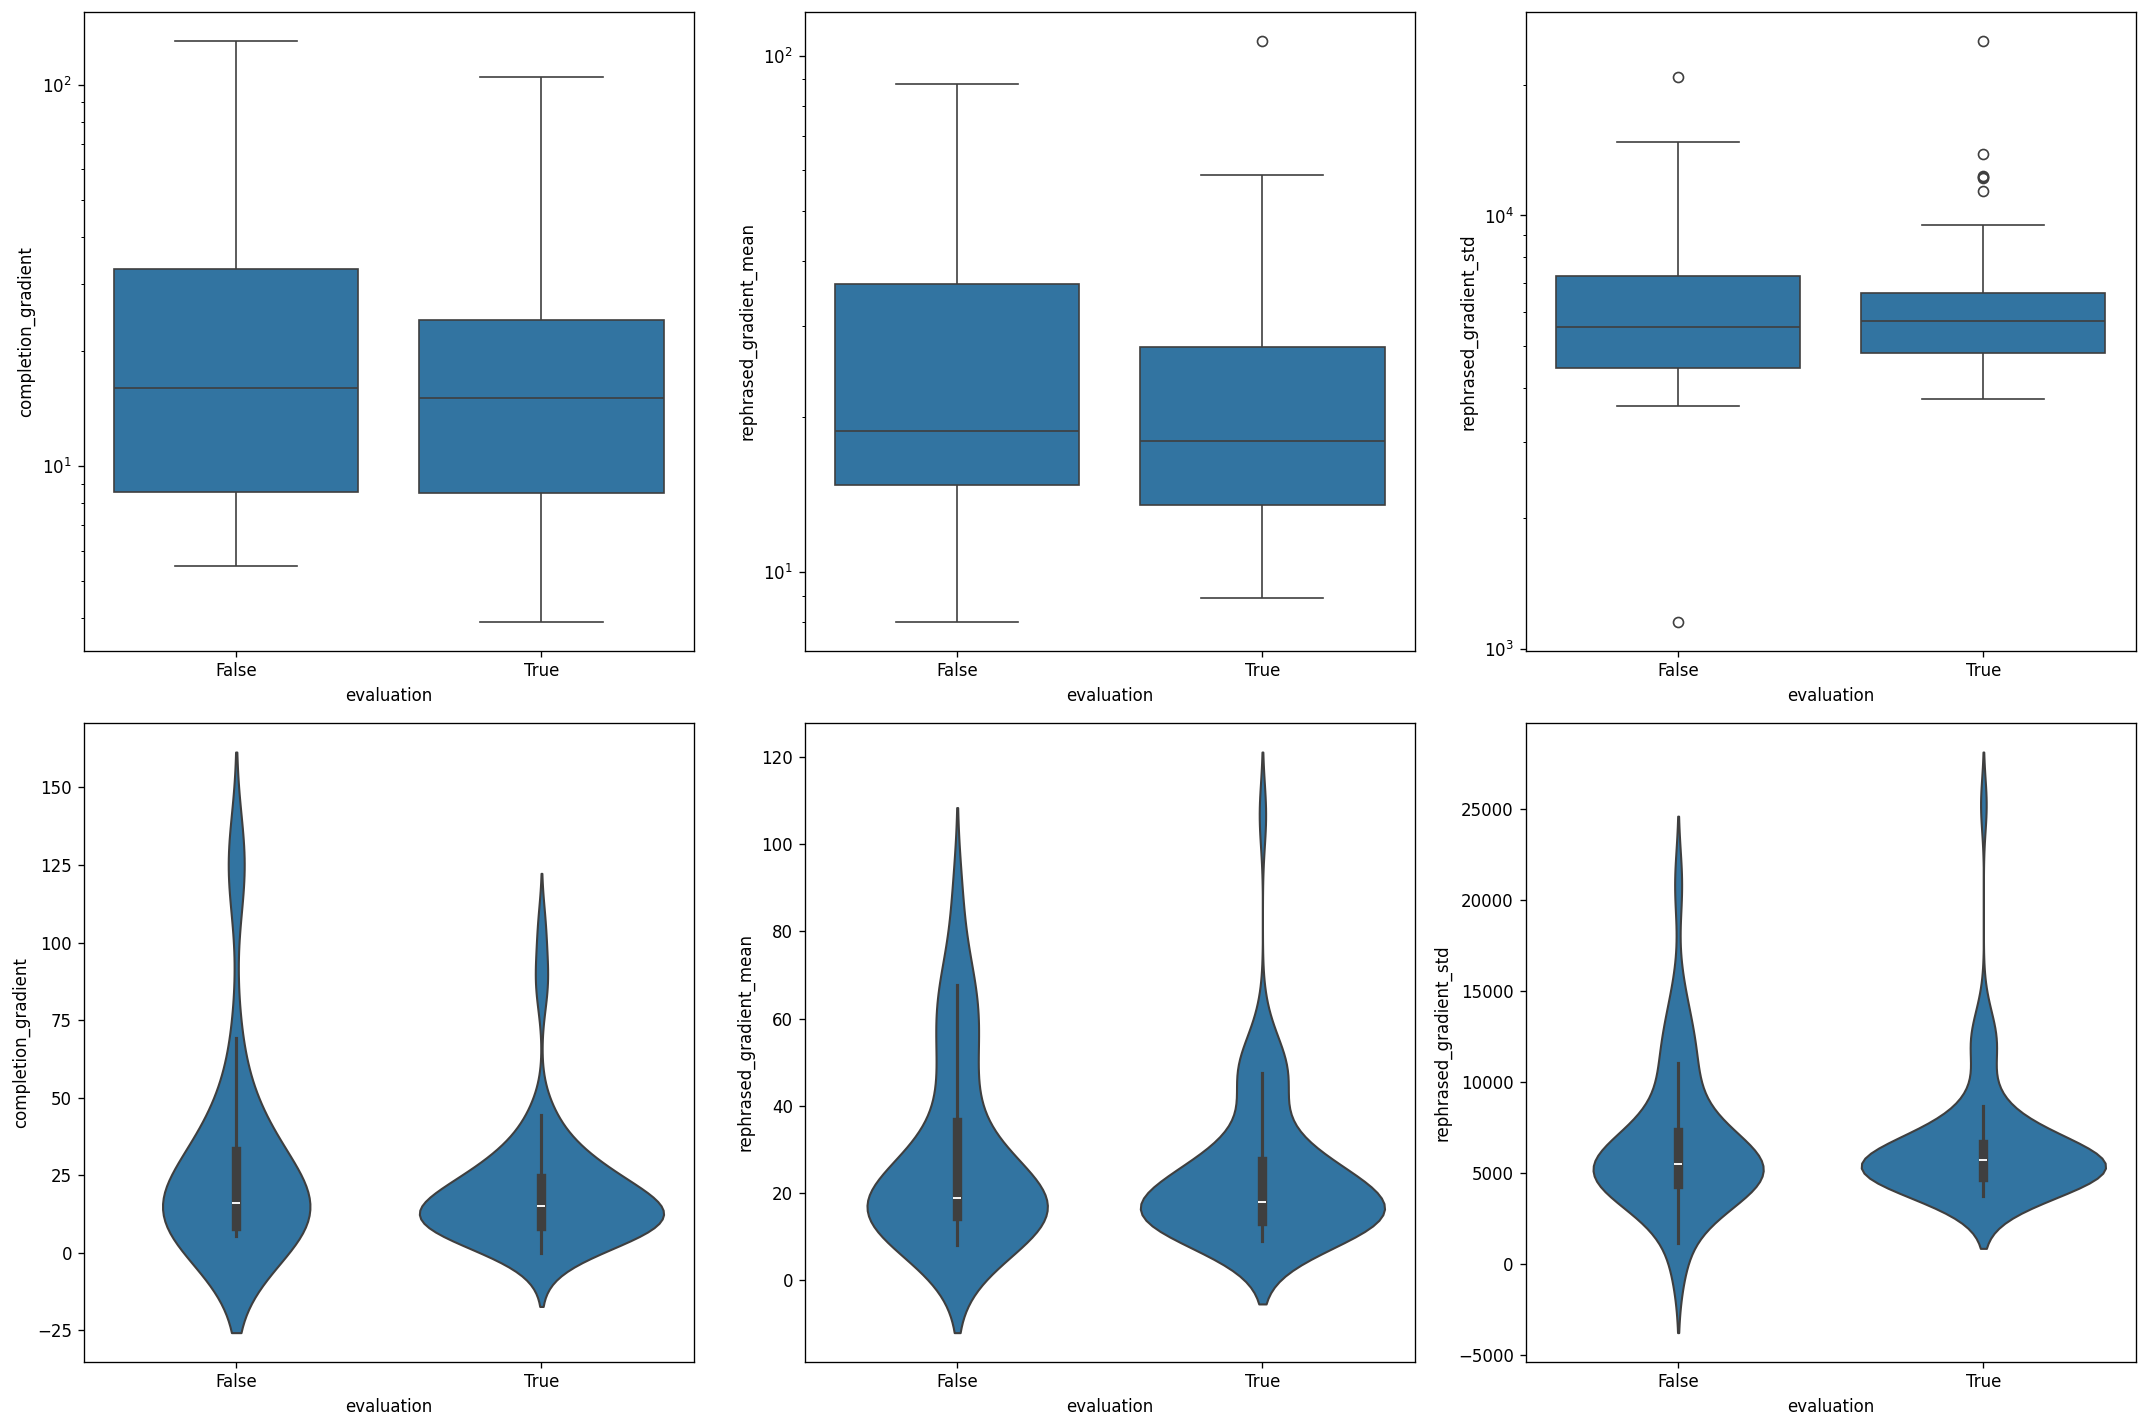

In [163]:
plt_width = 3
plt_height = 2

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.boxplot(data=df, x="evaluation", y="completion_gradient", ax=axs[0][0], log_scale=True)
sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_mean", ax=axs[0][1], log_scale=True)
sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_std", ax=axs[0][2], log_scale=True)
sns.violinplot(data=df, x="evaluation", y="completion_gradient", ax=axs[1][0])
sns.violinplot(data=df, x="evaluation", y="rephrased_gradient_mean", ax=axs[1][1])
sns.violinplot(data=df, x="evaluation", y="rephrased_gradient_std", ax=axs[1][2])

plt.tight_layout()

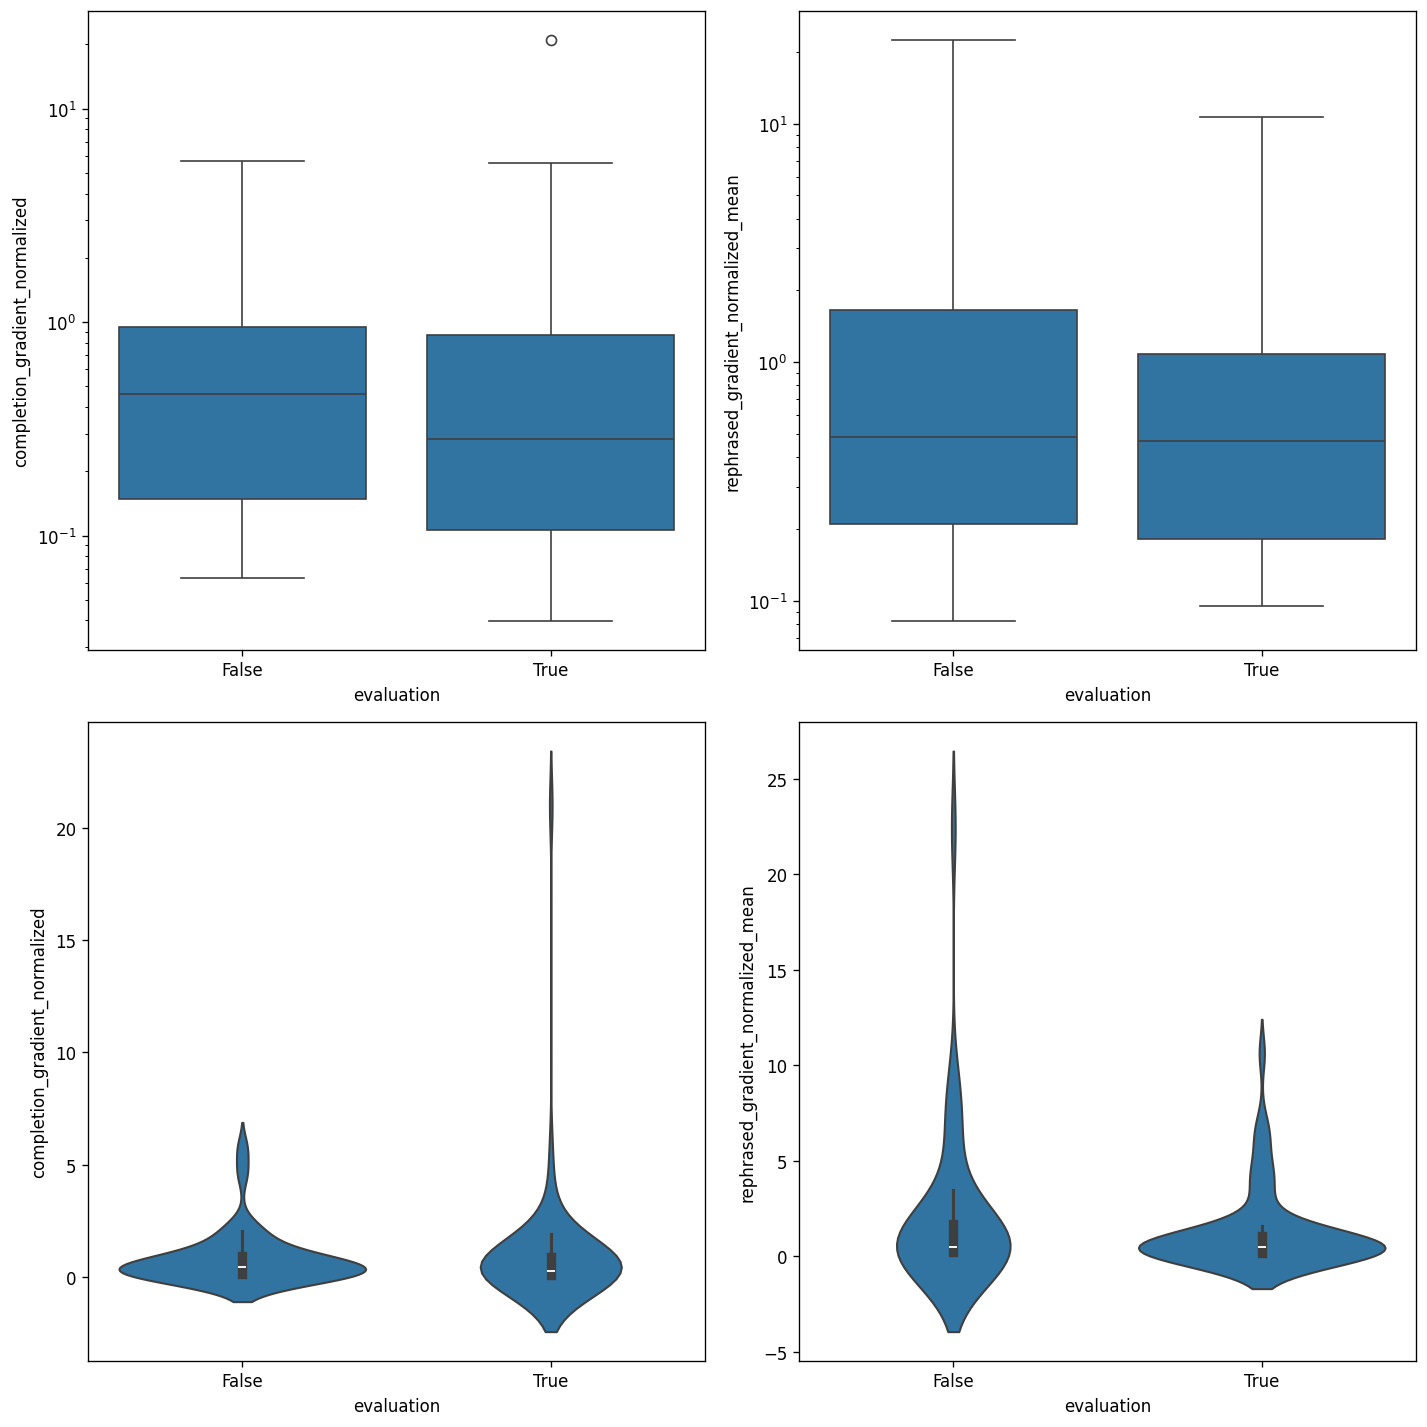

In [159]:
plt_width = 2
plt_height = 2

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.boxplot(data=df, x="evaluation", y="completion_gradient_normalized", ax=axs[0][0], log_scale=True)
sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_normalized_mean", ax=axs[0][1], log_scale=True)
sns.violinplot(data=df, x="evaluation", y="completion_gradient_normalized", ax=axs[1][0])
sns.violinplot(data=df, x="evaluation", y="rephrased_gradient_normalized_mean", ax=axs[1][1])

plt.tight_layout()

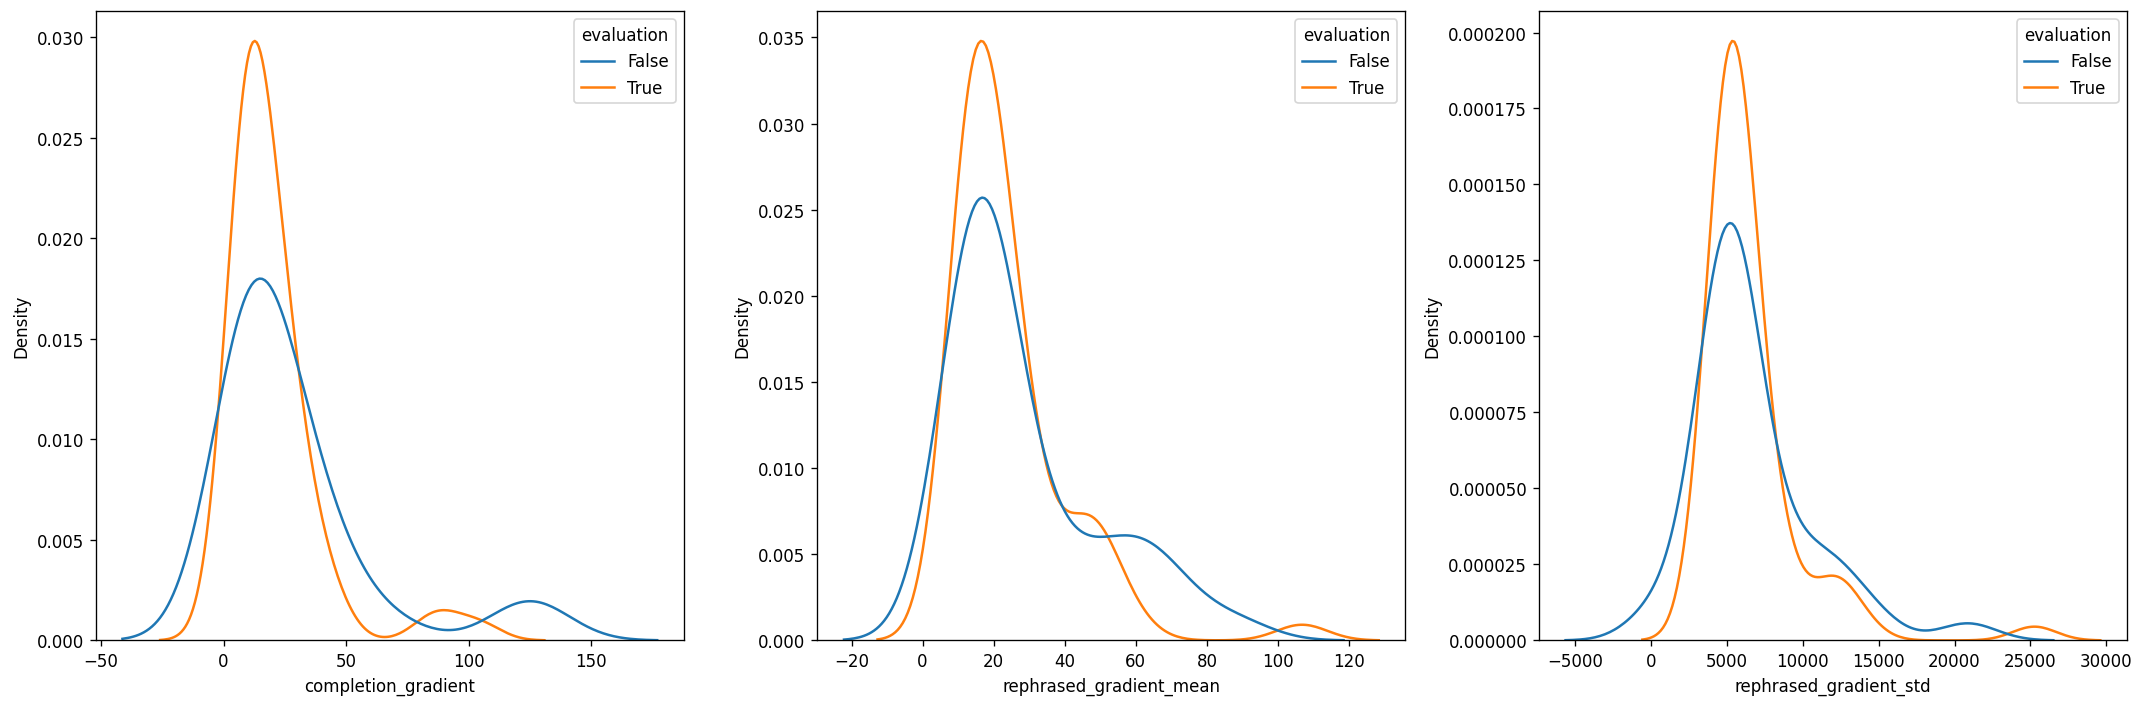

In [160]:
plt_width = 3
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.kdeplot(data=df, x="completion_gradient", hue="evaluation", common_norm=False, ax=axs[0])
sns.kdeplot(data=df, x="rephrased_gradient_mean", hue="evaluation", common_norm=False, ax=axs[1])
sns.kdeplot(data=df, x="rephrased_gradient_std", hue="evaluation", common_norm=False, ax=axs[2])

plt.tight_layout()

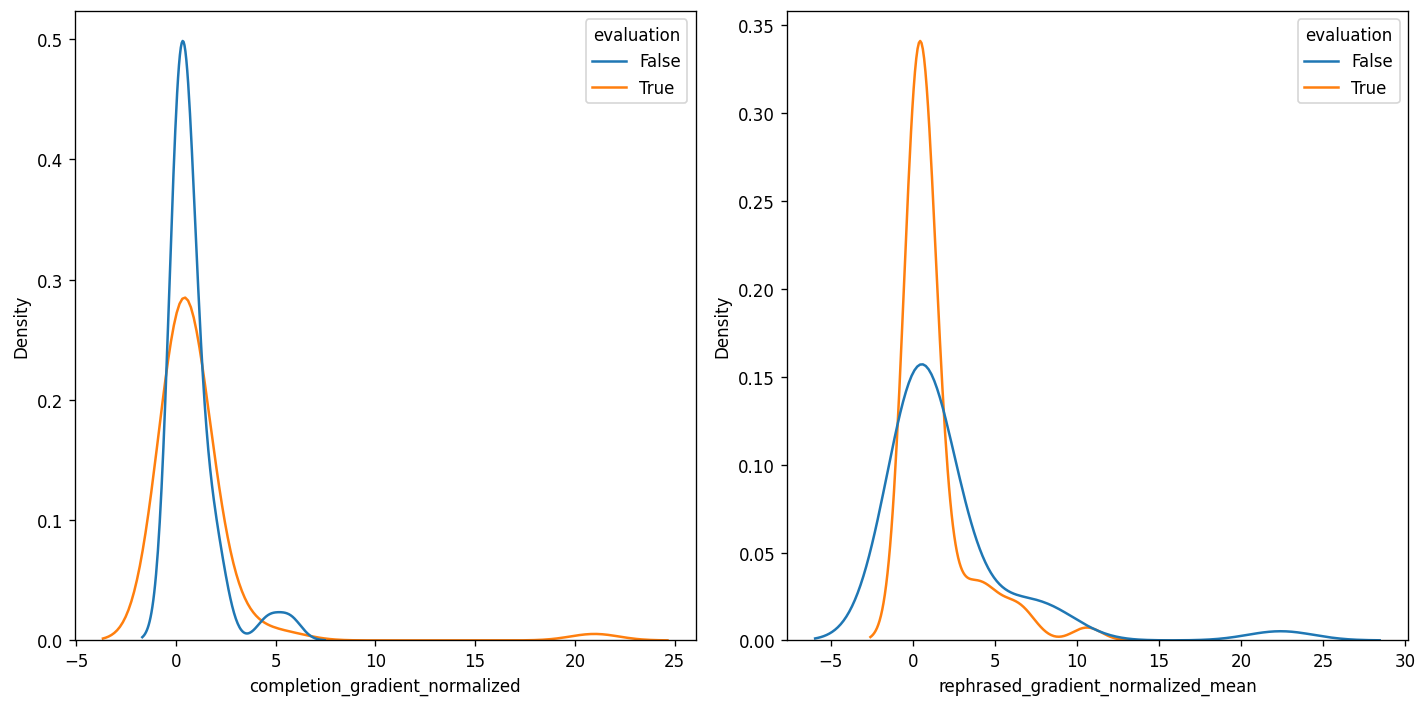

In [161]:
plt_width = 2
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.kdeplot(data=df, x="completion_gradient_normalized", hue="evaluation", common_norm=False, ax=axs[0])
sns.kdeplot(data=df, x="rephrased_gradient_normalized_mean", hue="evaluation", common_norm=False, ax=axs[1])

plt.tight_layout()